<a href="https://colab.research.google.com/github/Nezu-life/Data_Science_For_Medicine_and_Biology/blob/main/Colab_Notebooks/Statistics_Evaluating_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

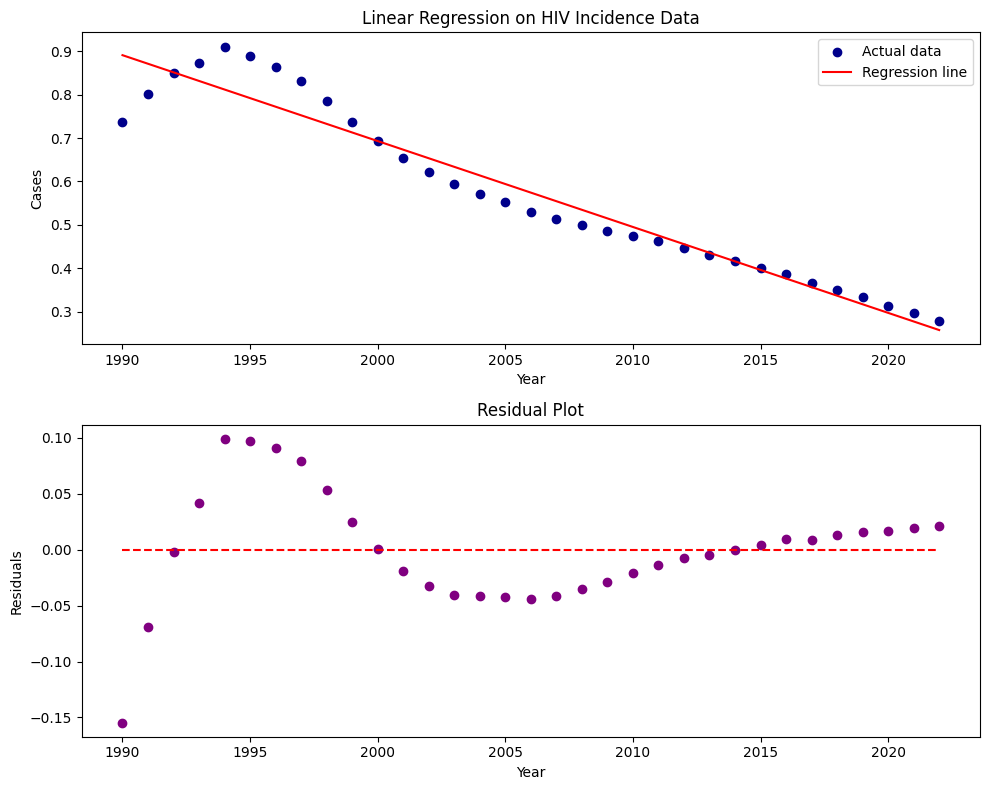

cases = 40.25 + -0.02*year
Intercept: 40.250767556818175
Coefficient for year: -0.019778896724598927
Mean Squared Error (MSE): 0.002498427092443459
Root Mean Squared Error (RMSE): 0.049984268449617814
Coefficient of Determination (R^2): 0.9341959128837655
Adjusted R^2: 0.9320732003961449


In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/HIV_world.csv"
df = pd.read_csv(fileName)

# Reshape the 'year' column to use it in sklearn
X = df['year'].values.reshape(-1, 1)
y = df['cases'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot the original data and the regression line on the first subplot
axs[0].scatter(X, y, color='darkblue', label='Actual data')
axs[0].plot(X, y_pred, color='red', label='Regression line')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Cases')
axs[0].set_title('Linear Regression on HIV Incidence Data')
axs[0].legend()

# Calculate and plot residuals on the second subplot
residuals = y - y_pred
axs[1].scatter(X, residuals, color='purple')
axs[1].hlines(y=0, xmin=X.min(), xmax=X.max(), colors='red', linestyles='dashed')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residual Plot')

# Display the plots
plt.tight_layout()
plt.show()

# Print the regression equation and parameters
equation = f"cases = {model.intercept_:.2f} + {model.coef_[0]:.2f}*year"
print(equation)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for year: {model.coef_[0]}")

# Calculating and Printing Evaluation Measures
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")
print(f"Adjusted R^2: {adjusted_r2}")
